# TimeSeries analysis and modelling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.api import datasets

from nescience.timeseries import TimeSeries

## Auto-miscoding

Load sample data: Mauna Loa Weekly Atmospheric CO2 Data.

In [3]:
co2  = datasets.co2.load_pandas()
data = co2.data.dropna(axis=0).values.flatten()

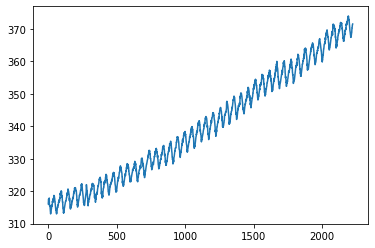

In [4]:
plt.plot(data)
plt.show()

Next code computes a classical auto-correlogram for this time series.

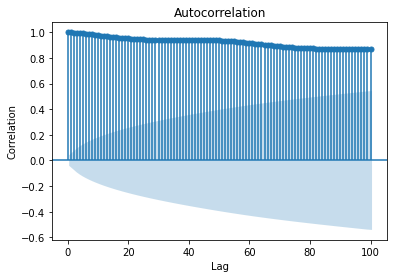

In [13]:
plot_acf(data, lags=100)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

Auto-correlation is not defined in case of non-stationary time series.

Let see how auto-miscoding applies to the same time series:

In [11]:
ts = TimeSeries(auto=False)
ts.fit(data)
mscd = ts.auto_miscoding(max_lag=100)

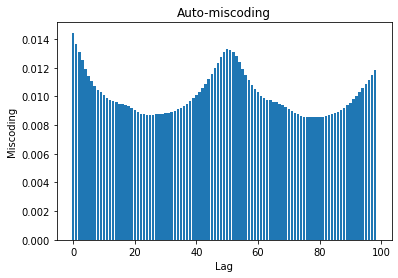

In [12]:
plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.xlabel("Lag")
plt.ylabel("Miscoding")
plt.title("Auto-miscoding")
plt.show()

Automiscoding can work with non-stationary time series, and has successfully detected the seasonal component.

## Cross-Miscoding

Load sample data: US Macroeconomic Data for 1959Q1 - 2009Q3.

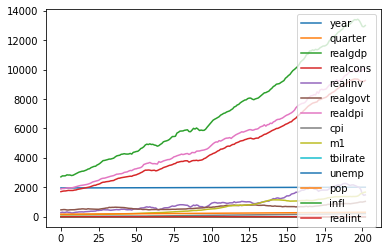

In [45]:
mdata = datasets.macrodata.load_pandas().data
mdata.plot()
plt.show()

We want to identify which are the attributes that have a higher (temporal) predictive power over the unemployment.

In [20]:
mdata = mdata.drop(["year", "quarter"], axis=1)
y = mdata["unemp"]
X = mdata.drop(["unemp"], axis=1)


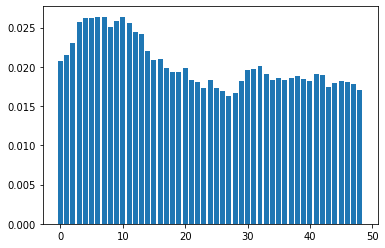

In [42]:
ts = TimeSeries(multivariate=True, auto=False)
ts.fit(y, X)
mscd = ts.cross_miscoding(attribute=0, max_lag=50)
plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.show()

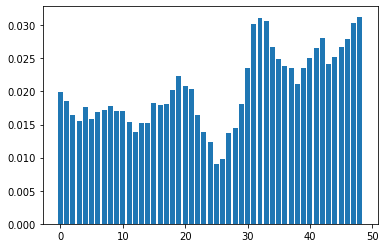

In [41]:
ts = TimeSeries(multivariate=True, auto=False)
ts.fit(y, X)
mscd = ts.cross_miscoding(attribute=3, max_lag=50)

plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.show()

In the short term, it seems that "realgdp" has a higher predictive power than "realgovt".

## Forecasting

Naive target goal against we can compare.

In [43]:
def dummy_score(ts):
    mean = np.mean(ts)
    u = np.sum([(ts[i] - ts[i-1])**2 for i in range(0, len(ts)-1)])
    v = np.sum([(ts[i] - mean)**2 for i in range(0, len(ts)-1)])
    score = 1 - u/v
    return score

Load sample data: World Copper Market 1951-1975 Dataset

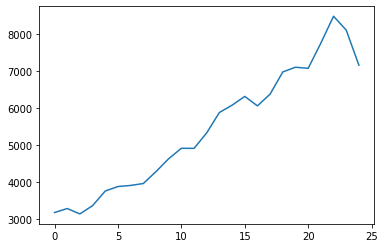

In [54]:
data = datasets.copper.load_pandas().data
copper = data["WORLDCONSUMPTION"]
copper.plot()
plt.show()

In [56]:
dummy_score(np.array(copper))

0.7077162085429185

In [61]:
model = TimeSeries()
model.fit(copper)
model.score(copper)

0.907759516102461

In [62]:
type(model.get_model())

sklearn.linear_model._base.LinearRegression